# Supervised Machine Learning Models - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format

#### Two Types of Supervised Machine Learning Models

Recall:

1. **Classification**: Models where we seek a yes-or-no prediction, such as "Is this financial transaction fraudulent?", "Will this firm default on its debt?", and so on.

2. **Continuous**: Models where the value being predicted falls somewhere on a continuous spectrum such as a predicted sales figure or a financial risk score.

Logisitic regression is an example of a classification model, while linear regression is an example of a continuous model.

In this lecture, we will learn how to estimate linear regression prediction models in Python.

#### Machine Learning with Continuous Dependent Variables

To demonstrate linear regression, we'll use a credit default swap dataset.

#### CDS Spread Data

A credit default swap (CDS) is a financial instrument that acts much like an insurance policy against the probability of default. 

With auto insurance, an insurance company promises to reimburse you if your vehicle crashes. In return, you make insurance premium payments.

With a credit default swap, another party promises to repay the firm's debt and interest payments if the firm defaults. In return, the purchaser of the swap makes premium payments. These premium payments are captured by the CDS spread.

The higher the CDS spread, the more expensive the premium payments to insure the debt. Thus a higher spread indicates more risky debt.

The CDS spread is a continuous variable. We will use linear regression to see if we can predict the CDS spread.  The data is contained in the **cds.csv** file (a synthetic dataset) and contains the following variables:

| Variable | Definition |
| --- | --- |
| gvkey | Firm identifier |
| datadate | Fiscal period end date |
| ln_cds | The natural logarithm of  the credit default swap spread |
| ln_mve | The natural logarithm of market value of equity |
| btm | book-to-market ratio (book value of equity divided by market value of equity |
| retvol | return volatility (standard deviation of monthly stock returns over the previous 5 years) |
| ch_price | one-year percentage change in stock price |
| roa | return on assets (income before extraordinary items / assets) |
| lev | leverage ratio (total liabilities / total assets) |
| std_income | the standard deviation of quarterly income before extraordinary items over the previous 5 years |

Let's import the data and create training and testing sets.

In [2]:
df = pd.read_csv('cds.csv')
df.head()

,gvkey,datadate,lev,roa,btm,retvol,ch_price,std_income,default,ln_mve,ln_cds
0,1,6/30/2009,1.493,0.013,-2.452,0.516,-2.440,360.054,1,6.327,7.682
1,2,12/31/2008,0.845,-0.225,1.399,0.251,-6.400,78.278,1,5.828,8.262
2,3,6/30/2005,0.731,0.003,1.017,0.109,-4.590,86.734,1,7.722,6.078
3,4,6/30/2005,1.311,-0.018,-13.049,0.277,-3.360,659.148,1,6.283,8.674
4,5,9/30/2011,1.323,-0.042,-7.839,0.292,-3.420,284.212,1,5.350,8.180


In [3]:
X = df[['ln_mve','btm','retvol','ch_price','roa','lev','std_income']].assign(_const=1)
y = df[['ln_cds']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) # Note, we can't use stratify=y because that option is only available for categorical dependent variables

print(f'# Observations in X_train: {len(X_train)}')
print(f'# Observations in y_train: {len(y_train)}')
print(f'# Observations in X_test: {len(X_test)}')
print(f'# Observations in y_test: {len(y_test)}')

display(X_train.head())
display(y_train.head())

# Observations in X_train: 11538
# Observations in y_train: 11538
# Observations in X_test: 2885
# Observations in y_test: 2885


,ln_mve,btm,retvol,ch_price,roa,lev,std_income,_const
3292,8.383,0.204,0.056,-1.370,0.037,0.526,14.426,1
14041,8.552,0.488,0.123,3.940,-0.001,0.614,693.159,1
13827,8.483,0.274,0.070,2.570,0.018,0.743,17.969,1
10708,7.259,0.207,0.091,3.170,0.036,0.616,11.450,1
6159,8.840,0.207,0.197,13.740,0.013,0.781,46.831,1


,ln_cds
3292,3.144
14041,6.825
13827,4.036
10708,5.093
6159,5.103


Now, let's use linear regression to train the model and then create the prediction in the test set.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train.values.ravel())

y_test['ln_cds_p'] = model.predict(X_test)
y_test.head()

,ln_cds,ln_cds_p
8910,3.676,4.513
10726,3.280,5.241
2135,3.624,3.279
11294,4.789,4.625
7816,4.124,4.408


The **LinearRegression** function in **sklearn** doesn't provide model output. To view the output, we can use the **statsmodels.api** package.

In [5]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_cds   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2084.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:13:35   Log-Likelihood:                -12639.
No. Observations:               11538   AIC:                         2.529e+04
Df Residuals:                   11530   BIC:                         2.535e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_mve        -0.2972      0.006    -49.139      0.0

To determine the accuracy of the prediction, we cannot use a confusion matrix to obtain the number of false positives, true positives, etc. because the dependent variable and the prediction variable are not categorical.

Alternatively, one way to assess the accuracy of the prediction is to run a regression of the actual variable on the predicted variable. The R-squared of the regression measures the amount of variation in the actual outcome that can be accounted for by the model's prediction. A higher R-squared indicates a better overall fit between the model's prediction and the actual value.

We can also check the coefficient on the predicted value. A coefficient closer to 1 indicates the prediction provides a closer estimate of the actual value.

To compute this regression and view the output, we can use the **statsmodels.api** package.

In [6]:
model = sm.OLS(y_test['ln_cds'], y_test[['ln_cds_p']].assign(_const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_cds   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     3197.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:14:48   Log-Likelihood:                -3265.9
No. Observations:                2885   AIC:                             6536.
Df Residuals:                    2883   BIC:                             6548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_cds_p       0.9641      0.017     56.543      0.0

We can also see the relation between the actual and predicted values graphically.

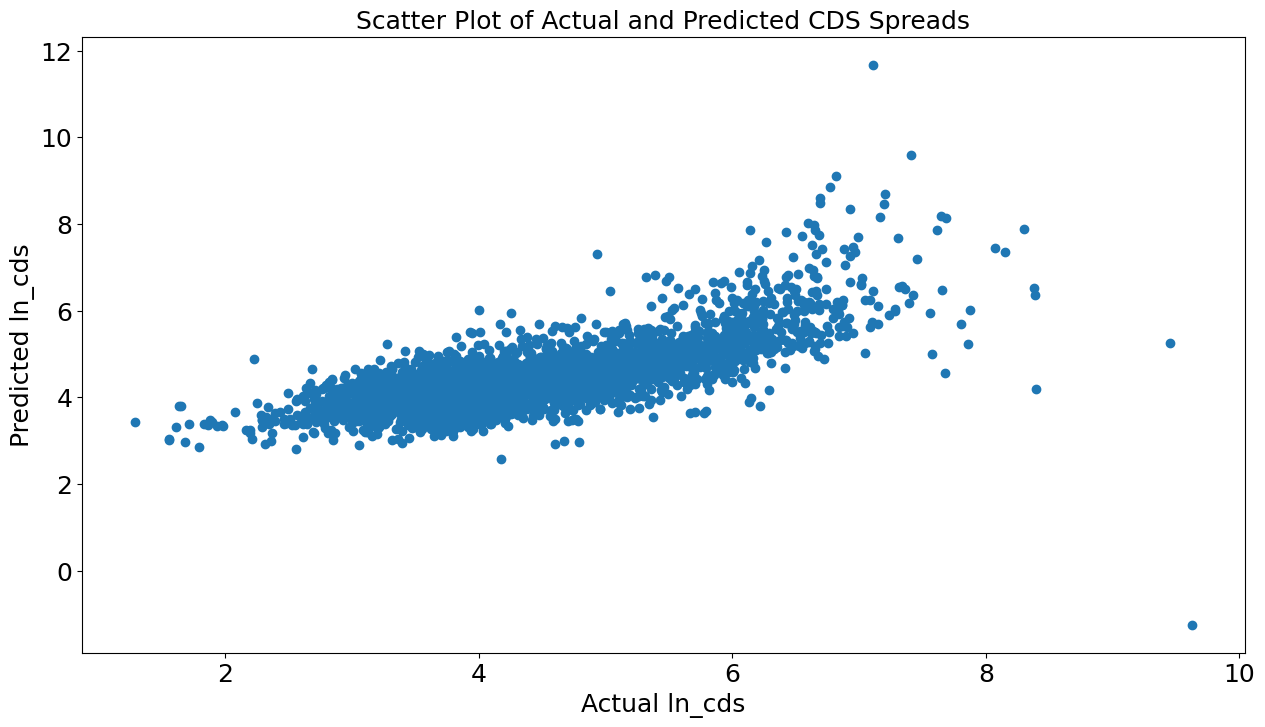

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
plt.scatter(y_test['ln_cds'],y_test['ln_cds_p'])
plt.xlabel('Actual ln_cds',size=18)
plt.ylabel('Predicted ln_cds',size=18)
plt.title('Scatter Plot of Actual and Predicted CDS Spreads',size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()

#### Exercise

In this exercise you will use the **Financial_Data.csv** files to predict future sales growth using linear regression. There are 5 files, one for each year from 2014 to 2018:   

        2014_Financial_Data.csv
        2015_Financial_Data.csv
        2016_Financial_Data.csv
        2017_Financial_Data.csv
        2018_Financial_Data.csv

The data was obtained from https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018 and contains many financial variables for firms from 2014 to 2018. Among these variables are the following:

| Variable | Definition |
| --- | --- |
| Unnamed column | stock market ticker |
| Revenue | revenue  |
| Revenue Growth | revenue growth from year t-1 to t |
| SG&A Expense | sg&a expenses  |
| Total assets | total assets  |
| Net Income | net income |
| grossProfitMargin | (revenue - cogs) / revenue  |
| returnOnAssets | net income  / total assets  |
| debtEquityRatio | total liabilities  / total shareholder equity  |
| Free Cash Flow margin | free cash flow  / revenue  |
| priceToBookRatio | market price per share / book value per share  |
| fixedAssetTurnover | revenue  / average fixed assets |
| assetTurnover | revenue  / average total assets |
| currentRatio | current assets  / current liabilities  |
| daysOfSalesOutstanding | (average accounts receivable  / revenue ) * 365 |
| daysOfInventoryOutstanding | (average inventory  / cost of goods sold ) * 365 |
| daysOfPayablesOutstanding | (average accounts payable  / cost of goods sold ) * 365 |
| interestCoverage | earnings before interest and taxes (EBIT)  / interest expense  |
| effectiveTaxRate | income tax expense / pretax income  |
| capitalExpenditureCoverageRatios | cash flow from operations / capital expenditures |
| dividendPayoutRatio | dividends per share / earnings per share |

Use ordinary least squares to predict revenue growth for year t+1 (**Fut Revenue Growth**) using the following independent variables:

        Revenue Growth
        sga_expenses
        roa
        ln_assets
        grossProfitMargin
        debtEquityRatio
        Free Cash Flow margin
        priceToBookRatio
        fixedAssetTurnover
        assetTurnover
        currentRatio
        daysOfSalesOutstanding
        daysOfInventoryOutstanding
        daysOfPayablesOutstanding
        interestCoverage
        capitalExpenditureCoverageRatios
        dividendPayoutRatio

You will need to calculate **Fut Revenue Growth** (**Revenue Growth** in year t+1), **sga_expenses** (**SG&A Expense**/**Revenue**), **roa** (**Net Income**/**Total assets**), and **ln_assets** (natural logarithm of **Total assets**). All other variables are included as columns in the datasets. Replace null values in the **sga_expenses** and **dividendPayoutRatio** columns with 0. Remove rows with missing data for any of these variables. Winsorize all variables at the 1st and 99th percentiles.

Train the linear regression model on a random sample of 75% of the observations in the dataset, and test the model on the remaining 25% of the observations in the dataset. How well did the model perform?